<a href="https://colab.research.google.com/github/chernoskutov1989dv/Self-Education/blob/main/20_variative_encoder_vae_se_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten, Reshape, Input


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255

x_train = np.reshape (x_train, (len(x_train), 28,28, 1 ))

x_test = np.reshape (x_test, (len(x_test), 28,28, 1 ))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = Input ((28, 28, 1))


x = Flatten ()(input_img)
x = Dense (128, activation = "relu") (x)

x = Dense (64, activation = "relu") (x)

encoded = Dense (2, activation = "linear") (x)
input_enc = Input(shape = (2,))


d = Dense (64, activation = "relu") (input_enc)
d = Dense (28*28, activation = "sigmoid") (d)
 
decoded = Reshape ((28, 28, 1)) (d)

encoder = keras.Model (input_img, encoded, name = "encoder")
decoder = keras.Model (input_enc, decoded, name = "decoder")


autoencoder = keras.Model (input_img, decoder (encoder(input_img)), name = "autoencoder")
autoencoder.compile (optimizer = "adam", loss ="mean_squared_error")


In [ ]:
autoencoder.fit (x_train, x_train,
                 epochs=10, 
                 batch_size = 64,
                 shuffle=True)


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0597
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0494
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0472
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0456
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0444
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0436
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0430
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0425
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0420
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0416


In [ ]:
h = encoder.predict (x_test)

313/313 [==============================] - 0s 909us/step


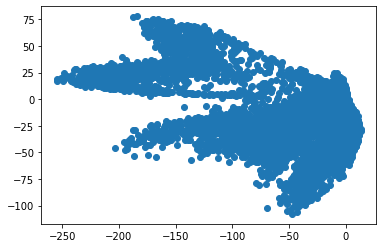

In [ ]:
a = plt.scatter (h [:, 0], h[:, 1])

1/1 [==============================] - 0s 43ms/step


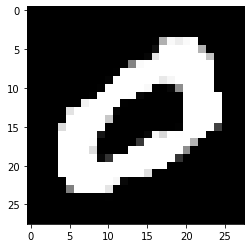

In [ ]:
img = decoder.predict(np.expand_dims ([50, -250], axis =0))
plt.imshow(img.squeeze(), cmap = "gray")


1/1 [==============================] - 0s 14ms/step


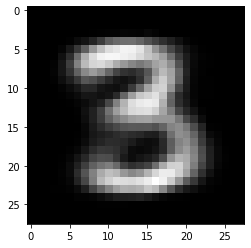

In [ ]:
img = decoder.predict(np.expand_dims ([0, 0], axis =0))
plt.imshow(img.squeeze(), cmap = "gray")


1/1 [==============================] - 0s 14ms/step


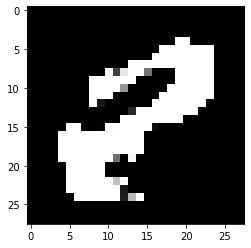

In [ ]:
img = decoder.predict(np.expand_dims ([-1000, 1000], axis =0))
plt.imshow(img.squeeze(), cmap = "gray")


